# CNN for fNIRS data analysis for Human Activity Recognition (HAR)

In [2]:
% ls ../../../datasets/fNIRs_data_10subjects/

all-fNIRs-data.zip  P13-4-17-2018/  P16-4-18-2018/  P19-4-19-2018/
P11-4-17-2018/      P14-4-18-2018/  P17-4-18-2018/  P20-4-19-2018/
P12-4-17-2018/      P15-4-18-2018/  P18-4-19-2018/


In [3]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [4]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [5]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data_10subjects/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/2. Both Hands/fNIR_data.t

In [6]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape, allpaths[each])
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2388, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
(1244, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
(2389, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
(1201, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
(2372, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
(1210, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
(2378, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
(1202, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
(1222, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
(2405, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt
(1196, 42) /home/arasdar/da

In [7]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = allpaths[each][59:60]
    print(dfmat.dtype, dfmat.shape, label, allpaths[each])
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2387, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1243, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2388, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
float64 (1200, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2371, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1209, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2377, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
float64 (1201, 40) 4 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
float64 (1221, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2404, 40) 1 /home/arasdar/

(48, 48)

In [8]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [9]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

48 48
69615 69615
(250, 40) float64
1


In [10]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(69615, 250, 40) float64 (69615,) int64


In [11]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(48730, 250, 40) (20885, 250, 40) (48730,) (20885,)
float64 float64 int64 int64


In [12]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(48730, 250, 40) float64
(20885, 250, 40) float64


In [13]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[-5.84627086e-17 -4.77170347e-17  1.64426012e-17 ... -4.30259836e-17
   6.63946632e-17  5.25675679e-17]
 [ 6.83608493e-18  5.63996942e-17  3.37281791e-17 ... -4.36866950e-19
  -1.00883800e-16 -6.20544726e-17]
 [ 5.80264113e-17 -1.94499773e-17 -1.19452069e-17 ...  7.68361820e-19
  -5.25994643e-17  1.24851676e-18]
 ...
 [ 5.86916793e-17 -9.84915686e-18  6.90944668e-17 ... -3.63442546e-17
   7.74399356e-18 -1.55403884e-17]
 [ 8.05145220e-17 -5.25220016e-17 -5.06127734e-17 ... -8.81309299e-18
  -1.46529846e-16  3.59221967e-17]
 [-7.11107758e-17 -4.53726483e-17 -4.19984634e-17 ... -8.66898955e-19
  -7.12657012e-18 -3.47488643e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[-6.45986603e-17 -6.57468919e-17 -3.77401406e-17 ...  4.84971704e-17
  -3.78544322e-17  1.47622185e-17]
 [ 2.62817459e-17  4.41856537e-17  6.53109891e-17 ...  1.82939610e-17
  -8.06951665e-17 -8.90198457e-17]
 [ 5.44346841e-18 -1.81165433e-17 -1.26890226e-17 ...  6.09180729e-17
  -1.18459229e-16 -6.71290225e-17]
 ...
 [ 6.91490596e-17 -1.62666146e-17  6.68100693e-17 ... -3.34369300e-18
   1.67934190e-16  1.75530593e-17]
 [-4.97460717e-17  5.22870657e-17 -1.93445132e-17 ...  5.37672080e-17
   6.36045894e-17  2.34962211e-18]
 [-1.11846265e-17  6.02396328e-17  2.71376037e-17 ... -9.85349514e-18
  -7.94725124e-17  1.95518328e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [15]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(48730, 5) float64 (20885, 5) float64


In [16]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(34111, 250, 40) (14619, 250, 40) (20885, 250, 40) float64 float64 float64
(34111, 5) (14619, 5) (20885, 5) float64 float64 float64


In [17]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [18]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
X = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(X.shape, X.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(14619, 250, 40) <dtype: 'float32'> (34111, 250, 40) float64 (14619, 250, 40) float64 (20885, 250, 40) float64


In [19]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Y = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Y.shape, Y.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(14619, 5) <dtype: 'float32'> (34111, 5) float64 (14619, 5) float64 (20885, 5) float64


In [20]:
# print(X.shape, X.dtype)
# Wwidth, Wchannels, Wnumber = X.shape[1].value//2, X.shape[2].value, X.shape[2].value*2
# shape = [Wwidth, Wchannels, Wnumber]
# initial_value=tf.random_normal(dtype=X.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
# Wconv = tf.Variable(dtype=X.dtype, initial_value=initial_value, name=None, trainable=True)
# print(Wconv.shape, Wconv.dtype)
# Xconv = tf.nn.conv1d(data_format='NWC', filters=Wconv, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
#                      value=X)
# Xconv = tf.maximum(name=None, x=(-0.1*Xconv), y=Xconv)
# print(Xconv.shape, Xconv.dtype)

In [21]:
print(X.shape, X.dtype)

(14619, 250, 40) <dtype: 'float32'>


In [22]:
# This is the multiplication layer
# this part is flatening the input
shape = [X.shape[0].value, X.shape[1].value * X.shape[2].value]
X_reshaped = tf.reshape(name=None, shape=shape, tensor=X)
print(X_reshaped.shape, X_reshaped.dtype)
# their first axis or dimension stay the same
shape = [X_reshaped.shape[1].value, Y.shape[1].value]
initial_value = tf.random_normal(dtype=X_reshaped.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
W = tf.Variable(dtype=X_reshaped.dtype, initial_value=initial_value, name=None, trainable=True)
print(W.shape, W.dtype)
# The actual multiplication
# Y_ = Xconv_reshaped @ W
Y_ = tf.matmul(a=X_reshaped, b=W, name=None)
print(Y_.shape, Y_.dtype)
print(Y.shape, Y.dtype)

(14619, 10000) <dtype: 'float32'>
(10000, 5) <dtype: 'float32_ref'>
(14619, 5) <dtype: 'float32'>
(14619, 5) <dtype: 'float32'>


In [23]:
# Now I need to calculate the loss
loss_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_, name=None)
print(loss_tensor.shape, loss_tensor.dtype)
loss = tf.reduce_mean(axis=0, input_tensor=loss_tensor, name=None)
print(loss)

(14619,) <dtype: 'float32'>
Tensor("Mean:0", shape=(), dtype=float32)


In [24]:
# Backprop and SGD now using adam
opt = tf.train.AdamOptimizer().minimize(loss)
print(opt)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [25]:
print(Y_.shape, Y_.dtype, Y.shape, Y.dtype)

(14619, 5) <dtype: 'float32'> (14619, 5) <dtype: 'float32'>


In [26]:
# Accuracy
# tf.argmax(
#     input,
#     axis=None,
#     name=None,
#     dimension=None,
#     output_type=tf.int64
# )
# Y_NxCout, N:axis 1, Cout: axis 2
Y_argmax = tf.argmax(axis=1, name=None, input=Y_)
print(Y_argmax.shape, Y_argmax.dtype)
Yargmax = tf.argmax(axis=1, name=None, input=Y)
print(Yargmax.shape, Yargmax.dtype)

acc_tensor = tf.equal(name=None, x=Y_argmax, y=Yargmax)
print(acc_tensor.shape, acc_tensor.dtype)
# cast bool to int datatype for equal
acc_tensor = tf.cast(dtype=tf.float32, name=None, x=acc_tensor)
print(acc_tensor.shape, acc_tensor.dtype)
acc = tf.reduce_mean(axis=0, input_tensor=acc_tensor)
print(acc.shape, acc.dtype)

(14619,) <dtype: 'int64'>
(14619,) <dtype: 'int64'>
(14619,) <dtype: 'bool'>
(14619,) <dtype: 'float32'>
() <dtype: 'float32'>


In [27]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [28]:
# We should save the after training and validation
saver = tf.train.Saver() 
train_loss_mean, valid_loss_mean = [], []
train_acc_mean, valid_acc_mean = [], []

# now that we can calculate loss and optimize, we can start a session for calculating the error.
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # for every epoch start feeding the arrays into the tensors in the model
    for epoch in range(0, 2000, 1):
        train_loss, valid_loss = [], []
        train_acc, valid_acc = [], []
        
        # Training minibatches and feed them into the tensor
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=Xvalid.shape[0]):
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, _, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, opt, acc])
            train_loss.append(lossarr)
            train_acc.append(accarr)
            
        # Validation now which is one batch on every iteration
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=Xvalid.shape[0]): 
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
            valid_loss.append(lossarr)
            valid_acc.append(accarr)
        
        # printing out train and validation loss
        print('epoch:', epoch+1, 'train_loss:', np.mean(train_loss), 'valid_loss:', np.mean(valid_loss),
             'train_acc:', np.mean(train_acc), 'valid_acc:', np.mean(valid_acc))
        
        # Every epoch, for drawing the plot and their learning curve
        train_loss_mean.append(np.mean(train_loss))
        valid_loss_mean.append(np.mean(valid_loss))
        train_acc_mean.append(np.mean(train_acc))
        valid_acc_mean.append(np.mean(valid_acc))
        
    # After all epochs and at the end of training and validation
    saver.save(sess,'checkpoints/mlp-fnirs-har-10subjects.ckpt')

epoch: 1 train_loss: 125.29063 valid_loss: 117.4666 train_acc: 0.17579862 valid_acc: 0.17928723
epoch: 2 train_loss: 115.014404 valid_loss: 107.34454 train_acc: 0.17973186 valid_acc: 0.18578562
epoch: 3 train_loss: 104.90084 valid_loss: 97.70689 train_acc: 0.18681169 valid_acc: 0.19283125
epoch: 4 train_loss: 95.406296 valid_loss: 89.03618 train_acc: 0.19389151 valid_acc: 0.19714071
epoch: 5 train_loss: 86.81854 valid_loss: 80.81418 train_acc: 0.19679868 valid_acc: 0.18325467
epoch: 6 train_loss: 78.87457 valid_loss: 73.94204 train_acc: 0.17839798 valid_acc: 0.17538819
epoch: 7 train_loss: 72.44713 valid_loss: 68.69003 train_acc: 0.18520418 valid_acc: 0.2170463
epoch: 8 train_loss: 67.42387 valid_loss: 64.0844 train_acc: 0.221903 valid_acc: 0.21773036
epoch: 9 train_loss: 62.84797 valid_loss: 59.47653 train_acc: 0.22347629 valid_acc: 0.22381832
epoch: 10 train_loss: 58.364563 valid_loss: 55.386887 train_acc: 0.2285724 valid_acc: 0.21102674
epoch: 11 train_loss: 54.51501 valid_loss: 51.

epoch: 87 train_loss: 3.5619676 valid_loss: 3.532833 train_acc: 0.5181271 valid_acc: 0.52192354
epoch: 88 train_loss: 3.5387635 valid_loss: 3.5099645 train_acc: 0.51959777 valid_acc: 0.5232232
epoch: 89 train_loss: 3.515935 valid_loss: 3.487443 train_acc: 0.52110267 valid_acc: 0.5247281
epoch: 90 train_loss: 3.493445 valid_loss: 3.4653249 train_acc: 0.52226555 valid_acc: 0.5263698
epoch: 91 train_loss: 3.4712954 valid_loss: 3.443572 train_acc: 0.5239414 valid_acc: 0.5279431
epoch: 92 train_loss: 3.449492 valid_loss: 3.4220808 train_acc: 0.5256516 valid_acc: 0.53026885
epoch: 93 train_loss: 3.4280138 valid_loss: 3.40083 train_acc: 0.52678025 valid_acc: 0.5317053
epoch: 94 train_loss: 3.4068382 valid_loss: 3.3798807 train_acc: 0.52855873 valid_acc: 0.53245777
epoch: 95 train_loss: 3.3859599 valid_loss: 3.3592658 train_acc: 0.53009784 valid_acc: 0.5341679
epoch: 96 train_loss: 3.3653812 valid_loss: 3.3389447 train_acc: 0.53208154 valid_acc: 0.53546757
epoch: 97 train_loss: 3.3450992 valid

epoch: 172 train_loss: 2.3633904 valid_loss: 2.339797 train_acc: 0.6177235 valid_acc: 0.618989
epoch: 173 train_loss: 2.3551197 valid_loss: 2.331475 train_acc: 0.6183734 valid_acc: 0.62008345
epoch: 174 train_loss: 2.3469281 valid_loss: 2.323231 train_acc: 0.61919415 valid_acc: 0.6213147
epoch: 175 train_loss: 2.3388143 valid_loss: 2.3150656 train_acc: 0.6205281 valid_acc: 0.6223408
epoch: 176 train_loss: 2.3307765 valid_loss: 2.3069742 train_acc: 0.62124634 valid_acc: 0.622888
epoch: 177 train_loss: 2.322814 valid_loss: 2.2989593 train_acc: 0.62206715 valid_acc: 0.62357205
epoch: 178 train_loss: 2.3149238 valid_loss: 2.2910163 train_acc: 0.6225802 valid_acc: 0.62425613
epoch: 179 train_loss: 2.3071055 valid_loss: 2.2831447 train_acc: 0.62343526 valid_acc: 0.6251454
epoch: 180 train_loss: 2.299357 valid_loss: 2.2753425 train_acc: 0.6239483 valid_acc: 0.6261714
epoch: 181 train_loss: 2.2916782 valid_loss: 2.2676103 train_acc: 0.6247007 valid_acc: 0.62678707
epoch: 182 train_loss: 2.2840

epoch: 257 train_loss: 1.8434441 valid_loss: 1.8177868 train_acc: 0.67231 valid_acc: 0.6761748
epoch: 258 train_loss: 1.8388206 valid_loss: 1.8131814 train_acc: 0.67292565 valid_acc: 0.6771325
epoch: 259 train_loss: 1.8342216 valid_loss: 1.8086013 train_acc: 0.67326766 valid_acc: 0.6774745
epoch: 260 train_loss: 1.8296473 valid_loss: 1.8040482 train_acc: 0.67371225 valid_acc: 0.67822695
epoch: 261 train_loss: 1.8250976 valid_loss: 1.7995198 train_acc: 0.6743621 valid_acc: 0.6785006
epoch: 262 train_loss: 1.8205731 valid_loss: 1.7950168 train_acc: 0.67487514 valid_acc: 0.6790478
epoch: 263 train_loss: 1.8160715 valid_loss: 1.7905396 train_acc: 0.67542243 valid_acc: 0.6800055
epoch: 264 train_loss: 1.8115947 valid_loss: 1.7860879 train_acc: 0.67614067 valid_acc: 0.6801423
epoch: 265 train_loss: 1.8071418 valid_loss: 1.7816604 train_acc: 0.6766879 valid_acc: 0.6806211
epoch: 266 train_loss: 1.8027122 valid_loss: 1.7772566 train_acc: 0.67726934 valid_acc: 0.68144196
epoch: 267 train_loss: 

epoch: 342 train_loss: 1.5226152 valid_loss: 1.5015075 train_acc: 0.71184754 valid_acc: 0.71803814
epoch: 343 train_loss: 1.51954 valid_loss: 1.4985147 train_acc: 0.7120528 valid_acc: 0.7183802
epoch: 344 train_loss: 1.5164782 valid_loss: 1.4955359 train_acc: 0.7126684 valid_acc: 0.7187906
epoch: 345 train_loss: 1.5134293 valid_loss: 1.4925699 train_acc: 0.7128737 valid_acc: 0.7189958
epoch: 346 train_loss: 1.5103934 valid_loss: 1.489618 train_acc: 0.71304464 valid_acc: 0.71913266
epoch: 347 train_loss: 1.50737 valid_loss: 1.4866791 train_acc: 0.71389973 valid_acc: 0.7193378
epoch: 348 train_loss: 1.5043592 valid_loss: 1.4837532 train_acc: 0.7141391 valid_acc: 0.71974826
epoch: 349 train_loss: 1.5013614 valid_loss: 1.4808406 train_acc: 0.71441275 valid_acc: 0.7200219
epoch: 350 train_loss: 1.4983768 valid_loss: 1.4779412 train_acc: 0.7148232 valid_acc: 0.7205007
epoch: 351 train_loss: 1.495404 valid_loss: 1.4750546 train_acc: 0.715302 valid_acc: 0.7209796
epoch: 352 train_loss: 1.49244

epoch: 427 train_loss: 1.3007381 valid_loss: 1.2876052 train_acc: 0.7417402 valid_acc: 0.7473151
epoch: 428 train_loss: 1.2985281 valid_loss: 1.2854916 train_acc: 0.741877 valid_acc: 0.74772555
epoch: 429 train_loss: 1.2963269 valid_loss: 1.2833858 train_acc: 0.7421848 valid_acc: 0.7479992
epoch: 430 train_loss: 1.2941332 valid_loss: 1.2812868 train_acc: 0.74242425 valid_acc: 0.74806756
epoch: 431 train_loss: 1.291947 valid_loss: 1.2791969 train_acc: 0.74262947 valid_acc: 0.7482728
epoch: 432 train_loss: 1.2897689 valid_loss: 1.2771134 train_acc: 0.74303985 valid_acc: 0.74875164
epoch: 433 train_loss: 1.2875984 valid_loss: 1.275038 train_acc: 0.7433135 valid_acc: 0.74895686
epoch: 434 train_loss: 1.2854352 valid_loss: 1.2729697 train_acc: 0.7437239 valid_acc: 0.7495041
epoch: 435 train_loss: 1.2832801 valid_loss: 1.2709092 train_acc: 0.7438607 valid_acc: 0.74991447
epoch: 436 train_loss: 1.2811322 valid_loss: 1.268856 train_acc: 0.74420273 valid_acc: 0.7501881
epoch: 437 train_loss: 1.

epoch: 512 train_loss: 1.1373427 valid_loss: 1.1316994 train_acc: 0.7655449 valid_acc: 0.76858884
epoch: 513 train_loss: 1.1356741 valid_loss: 1.1301104 train_acc: 0.76575005 valid_acc: 0.7689992
epoch: 514 train_loss: 1.1340103 valid_loss: 1.1285267 train_acc: 0.76609206 valid_acc: 0.76927286
epoch: 515 train_loss: 1.1323512 valid_loss: 1.1269474 train_acc: 0.7662973 valid_acc: 0.7696149
epoch: 516 train_loss: 1.1306974 valid_loss: 1.1253743 train_acc: 0.76663935 valid_acc: 0.7700253
epoch: 517 train_loss: 1.1290492 valid_loss: 1.1238055 train_acc: 0.7668445 valid_acc: 0.7700253
epoch: 518 train_loss: 1.1274054 valid_loss: 1.1222413 train_acc: 0.76698136 valid_acc: 0.77009374
epoch: 519 train_loss: 1.1257663 valid_loss: 1.1206809 train_acc: 0.7671865 valid_acc: 0.7702989
epoch: 520 train_loss: 1.1241324 valid_loss: 1.1191258 train_acc: 0.76742595 valid_acc: 0.77057254
epoch: 521 train_loss: 1.1225032 valid_loss: 1.117576 train_acc: 0.76756275 valid_acc: 0.77057254
epoch: 522 train_los

epoch: 597 train_loss: 1.0112518 valid_loss: 1.0118126 train_acc: 0.7848348 valid_acc: 0.7883576
epoch: 598 train_loss: 1.0099334 valid_loss: 1.0105603 train_acc: 0.78507423 valid_acc: 0.78863126
epoch: 599 train_loss: 1.0086182 valid_loss: 1.0093095 train_acc: 0.785211 valid_acc: 0.78890485
epoch: 600 train_loss: 1.0073066 valid_loss: 1.0080636 train_acc: 0.7854847 valid_acc: 0.78904164
epoch: 601 train_loss: 1.0059979 valid_loss: 1.0068204 train_acc: 0.78572404 valid_acc: 0.78938365
epoch: 602 train_loss: 1.0046926 valid_loss: 1.0055801 train_acc: 0.78589505 valid_acc: 0.7894521
epoch: 603 train_loss: 1.0033906 valid_loss: 1.0043426 train_acc: 0.7861345 valid_acc: 0.7897257
epoch: 604 train_loss: 1.0020921 valid_loss: 1.0031084 train_acc: 0.7863055 valid_acc: 0.7897941
epoch: 605 train_loss: 1.0007968 valid_loss: 1.0018774 train_acc: 0.7865107 valid_acc: 0.7899993
epoch: 606 train_loss: 0.9995041 valid_loss: 1.0006496 train_acc: 0.78692114 valid_acc: 0.79006773
epoch: 607 train_loss:

epoch: 681 train_loss: 0.9107648 valid_loss: 0.91631824 train_acc: 0.80357754 valid_acc: 0.80402213
epoch: 682 train_loss: 0.9096791 valid_loss: 0.91528624 train_acc: 0.80374855 valid_acc: 0.80402213
epoch: 683 train_loss: 0.90859556 valid_loss: 0.9142578 train_acc: 0.80391955 valid_acc: 0.8042958
epoch: 684 train_loss: 0.9075146 valid_loss: 0.91323 train_acc: 0.80405635 valid_acc: 0.8043642
epoch: 685 train_loss: 0.90643483 valid_loss: 0.91220444 train_acc: 0.80422735 valid_acc: 0.804501
epoch: 686 train_loss: 0.90535843 valid_loss: 0.91118187 train_acc: 0.8043642 valid_acc: 0.8047746
epoch: 687 train_loss: 0.904284 valid_loss: 0.9101608 train_acc: 0.8043984 valid_acc: 0.8050482
epoch: 688 train_loss: 0.90321153 valid_loss: 0.90914184 train_acc: 0.8045352 valid_acc: 0.805185
epoch: 689 train_loss: 0.9021415 valid_loss: 0.90812576 train_acc: 0.804672 valid_acc: 0.80559546
epoch: 690 train_loss: 0.9010737 valid_loss: 0.9071113 train_acc: 0.8049456 valid_acc: 0.8056639
epoch: 691 train_l

epoch: 765 train_loss: 0.82670605 valid_loss: 0.83651054 train_acc: 0.8174294 valid_acc: 0.8166769
epoch: 766 train_loss: 0.82578325 valid_loss: 0.835635 train_acc: 0.8174978 valid_acc: 0.81695056
epoch: 767 train_loss: 0.82486236 valid_loss: 0.83476126 train_acc: 0.81756616 valid_acc: 0.8171558
epoch: 768 train_loss: 0.82394284 valid_loss: 0.833889 train_acc: 0.81777143 valid_acc: 0.8171558
epoch: 769 train_loss: 0.8230249 valid_loss: 0.8330183 train_acc: 0.818045 valid_acc: 0.817361
epoch: 770 train_loss: 0.82210875 valid_loss: 0.83214855 train_acc: 0.81814766 valid_acc: 0.81742936
epoch: 771 train_loss: 0.82119465 valid_loss: 0.8312817 train_acc: 0.8183528 valid_acc: 0.81756616
epoch: 772 train_loss: 0.8202814 valid_loss: 0.8304155 train_acc: 0.8184897 valid_acc: 0.8177714
epoch: 773 train_loss: 0.8193701 valid_loss: 0.82955104 train_acc: 0.81859225 valid_acc: 0.8179082
epoch: 774 train_loss: 0.8184606 valid_loss: 0.8286883 train_acc: 0.8188659 valid_acc: 0.8179766
epoch: 775 train_

epoch: 849 train_loss: 0.754403 valid_loss: 0.7679369 train_acc: 0.83025515 valid_acc: 0.82823724
epoch: 850 train_loss: 0.7536005 valid_loss: 0.767175 train_acc: 0.83042616 valid_acc: 0.828374
epoch: 851 train_loss: 0.75279886 valid_loss: 0.7664146 train_acc: 0.83042616 valid_acc: 0.82857925
epoch: 852 train_loss: 0.7519982 valid_loss: 0.7656559 train_acc: 0.83059716 valid_acc: 0.8286477
epoch: 853 train_loss: 0.7511989 valid_loss: 0.76489806 train_acc: 0.8308024 valid_acc: 0.82892126
epoch: 854 train_loss: 0.7504004 valid_loss: 0.76414067 train_acc: 0.83087075 valid_acc: 0.8289897
epoch: 855 train_loss: 0.7496042 valid_loss: 0.7633851 train_acc: 0.8310076 valid_acc: 0.8293317
epoch: 856 train_loss: 0.7488083 valid_loss: 0.7626302 train_acc: 0.8311102 valid_acc: 0.8294685
epoch: 857 train_loss: 0.74801385 valid_loss: 0.7618775 train_acc: 0.8313154 valid_acc: 0.8294001
epoch: 858 train_loss: 0.7472206 valid_loss: 0.7611251 train_acc: 0.8314864 valid_acc: 0.8294685
epoch: 859 train_loss

epoch: 933 train_loss: 0.69097185 valid_loss: 0.7077824 train_acc: 0.8414734 valid_acc: 0.83856624
epoch: 934 train_loss: 0.69026244 valid_loss: 0.70711005 train_acc: 0.84157604 valid_acc: 0.83870304
epoch: 935 train_loss: 0.68955386 valid_loss: 0.70643806 train_acc: 0.8418155 valid_acc: 0.8388399
epoch: 936 train_loss: 0.68884647 valid_loss: 0.7057672 train_acc: 0.84205484 valid_acc: 0.8389767
epoch: 937 train_loss: 0.6881402 valid_loss: 0.70509773 train_acc: 0.84212327 valid_acc: 0.8391819
epoch: 938 train_loss: 0.6874344 valid_loss: 0.70442873 train_acc: 0.8421575 valid_acc: 0.83925027
epoch: 939 train_loss: 0.68673027 valid_loss: 0.70376086 train_acc: 0.8422601 valid_acc: 0.8393187
epoch: 940 train_loss: 0.68602675 valid_loss: 0.70309407 train_acc: 0.84236264 valid_acc: 0.8394555
epoch: 941 train_loss: 0.6853242 valid_loss: 0.70242816 train_acc: 0.8425337 valid_acc: 0.8395239
epoch: 942 train_loss: 0.6846227 valid_loss: 0.7017627 train_acc: 0.84273887 valid_acc: 0.8395239
epoch: 94

epoch: 1017 train_loss: 0.634689 valid_loss: 0.6544333 train_acc: 0.8531705 valid_acc: 0.84841645
epoch: 1018 train_loss: 0.63405704 valid_loss: 0.65383464 train_acc: 0.8533416 valid_acc: 0.84862167
epoch: 1019 train_loss: 0.6334262 valid_loss: 0.65323687 train_acc: 0.85344416 valid_acc: 0.8488269
epoch: 1020 train_loss: 0.63279605 valid_loss: 0.6526394 train_acc: 0.85358095 valid_acc: 0.8488269
epoch: 1021 train_loss: 0.63216627 valid_loss: 0.6520434 train_acc: 0.8536836 valid_acc: 0.8490321
epoch: 1022 train_loss: 0.6315379 valid_loss: 0.6514474 train_acc: 0.8537178 valid_acc: 0.8490321
epoch: 1023 train_loss: 0.63090986 valid_loss: 0.6508532 train_acc: 0.85388875 valid_acc: 0.8489637
epoch: 1024 train_loss: 0.630283 valid_loss: 0.650259 train_acc: 0.8539572 valid_acc: 0.8489637
epoch: 1025 train_loss: 0.6296569 valid_loss: 0.649666 train_acc: 0.8540256 valid_acc: 0.8491005
epoch: 1026 train_loss: 0.62903154 valid_loss: 0.64907444 train_acc: 0.854265 valid_acc: 0.8493057
epoch: 1027 

epoch: 1100 train_loss: 0.58493745 valid_loss: 0.6073356 train_acc: 0.8625077 valid_acc: 0.85710377
epoch: 1101 train_loss: 0.5843696 valid_loss: 0.60679775 train_acc: 0.8626787 valid_acc: 0.8571722
epoch: 1102 train_loss: 0.58380187 valid_loss: 0.606261 train_acc: 0.8628155 valid_acc: 0.85724056
epoch: 1103 train_loss: 0.5832352 valid_loss: 0.6057253 train_acc: 0.86295235 valid_acc: 0.857309
epoch: 1104 train_loss: 0.58266914 valid_loss: 0.60519 train_acc: 0.8630207 valid_acc: 0.857309
epoch: 1105 train_loss: 0.58210397 valid_loss: 0.6046547 train_acc: 0.8631917 valid_acc: 0.8575142
epoch: 1106 train_loss: 0.5815393 valid_loss: 0.6041205 train_acc: 0.8633627 valid_acc: 0.85758257
epoch: 1107 train_loss: 0.58097565 valid_loss: 0.60358715 train_acc: 0.86339694 valid_acc: 0.85758257
epoch: 1108 train_loss: 0.58041227 valid_loss: 0.60305434 train_acc: 0.8634653 valid_acc: 0.8577878
epoch: 1109 train_loss: 0.5798497 valid_loss: 0.60252196 train_acc: 0.8634995 valid_acc: 0.8577878
epoch: 11

epoch: 1183 train_loss: 0.54002506 valid_loss: 0.5648602 train_acc: 0.871537 valid_acc: 0.8648334
epoch: 1184 train_loss: 0.5395092 valid_loss: 0.56437284 train_acc: 0.87160546 valid_acc: 0.86503863
epoch: 1185 train_loss: 0.53899515 valid_loss: 0.5638872 train_acc: 0.87174225 valid_acc: 0.8651755
epoch: 1186 train_loss: 0.53848076 valid_loss: 0.5634012 train_acc: 0.87177646 valid_acc: 0.8653123
epoch: 1187 train_loss: 0.5379673 valid_loss: 0.5629161 train_acc: 0.8718791 valid_acc: 0.86538064
epoch: 1188 train_loss: 0.5374545 valid_loss: 0.56243104 train_acc: 0.87194747 valid_acc: 0.86538064
epoch: 1189 train_loss: 0.53694254 valid_loss: 0.56194687 train_acc: 0.8721185 valid_acc: 0.86538064
epoch: 1190 train_loss: 0.5364303 valid_loss: 0.56146324 train_acc: 0.8721185 valid_acc: 0.8655175
epoch: 1191 train_loss: 0.53591925 valid_loss: 0.56098104 train_acc: 0.8722553 valid_acc: 0.8656543
epoch: 1192 train_loss: 0.53540885 valid_loss: 0.5604987 train_acc: 0.87228954 valid_acc: 0.8656543
e

epoch: 1266 train_loss: 0.4991151 valid_loss: 0.5262692 train_acc: 0.87940353 valid_acc: 0.87345237
epoch: 1267 train_loss: 0.4986437 valid_loss: 0.52582514 train_acc: 0.8795403 valid_acc: 0.87345237
epoch: 1268 train_loss: 0.49817336 valid_loss: 0.525382 train_acc: 0.87971133 valid_acc: 0.87352073
epoch: 1269 train_loss: 0.49770248 valid_loss: 0.52493954 train_acc: 0.8798481 valid_acc: 0.87352073
epoch: 1270 train_loss: 0.49723288 valid_loss: 0.5244975 train_acc: 0.87995076 valid_acc: 0.87352073
epoch: 1271 train_loss: 0.4967634 valid_loss: 0.52405566 train_acc: 0.87995076 valid_acc: 0.87352073
epoch: 1272 train_loss: 0.49629453 valid_loss: 0.5236146 train_acc: 0.8800192 valid_acc: 0.87358916
epoch: 1273 train_loss: 0.49582574 valid_loss: 0.52317363 train_acc: 0.88012177 valid_acc: 0.8737944
epoch: 1274 train_loss: 0.49535793 valid_loss: 0.5227337 train_acc: 0.88019013 valid_acc: 0.8738628
epoch: 1275 train_loss: 0.49489033 valid_loss: 0.52229434 train_acc: 0.88025856 valid_acc: 0.873

epoch: 1349 train_loss: 0.46155787 valid_loss: 0.49105084 train_acc: 0.8864833 valid_acc: 0.8800191
epoch: 1350 train_loss: 0.46112347 valid_loss: 0.49064493 train_acc: 0.88655174 valid_acc: 0.8800191
epoch: 1351 train_loss: 0.46068954 valid_loss: 0.49024025 train_acc: 0.88662016 valid_acc: 0.88008755
epoch: 1352 train_loss: 0.4602567 valid_loss: 0.48983517 train_acc: 0.88662016 valid_acc: 0.880156
epoch: 1353 train_loss: 0.4598236 valid_loss: 0.48943076 train_acc: 0.8866886 valid_acc: 0.88022435
epoch: 1354 train_loss: 0.45939094 valid_loss: 0.4890271 train_acc: 0.886757 valid_acc: 0.88022435
epoch: 1355 train_loss: 0.45895934 valid_loss: 0.48862398 train_acc: 0.88685954 valid_acc: 0.8802928
epoch: 1356 train_loss: 0.45852774 valid_loss: 0.4882216 train_acc: 0.8869964 valid_acc: 0.8803612
epoch: 1357 train_loss: 0.4580961 valid_loss: 0.4878185 train_acc: 0.8870648 valid_acc: 0.8803612
epoch: 1358 train_loss: 0.45766565 valid_loss: 0.48741645 train_acc: 0.88709897 valid_acc: 0.8803612


epoch: 1432 train_loss: 0.42689317 valid_loss: 0.45879954 train_acc: 0.89352894 valid_acc: 0.88624394
epoch: 1433 train_loss: 0.42649162 valid_loss: 0.4584273 train_acc: 0.8936316 valid_acc: 0.88638073
epoch: 1434 train_loss: 0.42609054 valid_loss: 0.4580557 train_acc: 0.8938026 valid_acc: 0.88644916
epoch: 1435 train_loss: 0.42568988 valid_loss: 0.457685 train_acc: 0.8939736 valid_acc: 0.88644916
epoch: 1436 train_loss: 0.42528945 valid_loss: 0.4573139 train_acc: 0.894042 valid_acc: 0.88644916
epoch: 1437 train_loss: 0.4248898 valid_loss: 0.4569436 train_acc: 0.89414465 valid_acc: 0.8865175
epoch: 1438 train_loss: 0.4244901 valid_loss: 0.45657334 train_acc: 0.8943156 valid_acc: 0.8865175
epoch: 1439 train_loss: 0.4240909 valid_loss: 0.4562038 train_acc: 0.8943156 valid_acc: 0.8865175
epoch: 1440 train_loss: 0.4236921 valid_loss: 0.4558336 train_acc: 0.8943498 valid_acc: 0.8866544
epoch: 1441 train_loss: 0.42329323 valid_loss: 0.4554645 train_acc: 0.894384 valid_acc: 0.8866544
epoch: 1

epoch: 1515 train_loss: 0.3947963 valid_loss: 0.4291473 train_acc: 0.9011902 valid_acc: 0.89205825
epoch: 1516 train_loss: 0.39442405 valid_loss: 0.428805 train_acc: 0.90122443 valid_acc: 0.8921267
epoch: 1517 train_loss: 0.39405245 valid_loss: 0.4284625 train_acc: 0.90125865 valid_acc: 0.8921951
epoch: 1518 train_loss: 0.3936807 valid_loss: 0.42812023 train_acc: 0.9013612 valid_acc: 0.8921951
epoch: 1519 train_loss: 0.39330977 valid_loss: 0.4277781 train_acc: 0.90142965 valid_acc: 0.8921951
epoch: 1520 train_loss: 0.3929388 valid_loss: 0.42743704 train_acc: 0.9014981 valid_acc: 0.8921951
epoch: 1521 train_loss: 0.392568 valid_loss: 0.42709562 train_acc: 0.90156645 valid_acc: 0.8922635
epoch: 1522 train_loss: 0.39219803 valid_loss: 0.42675522 train_acc: 0.9016349 valid_acc: 0.8923319
epoch: 1523 train_loss: 0.39182836 valid_loss: 0.42641467 train_acc: 0.901669 valid_acc: 0.8923319
epoch: 1524 train_loss: 0.39145926 valid_loss: 0.4260742 train_acc: 0.9018059 valid_acc: 0.8924003
epoch: 

epoch: 1598 train_loss: 0.36500666 valid_loss: 0.4017757 train_acc: 0.90673095 valid_acc: 0.8978726
epoch: 1599 train_loss: 0.36466056 valid_loss: 0.40145898 train_acc: 0.90673095 valid_acc: 0.89794105
epoch: 1600 train_loss: 0.3643154 valid_loss: 0.40114284 train_acc: 0.90673095 valid_acc: 0.89807785
epoch: 1601 train_loss: 0.36396998 valid_loss: 0.40082556 train_acc: 0.9068336 valid_acc: 0.89807785
epoch: 1602 train_loss: 0.36362505 valid_loss: 0.40051004 train_acc: 0.90693617 valid_acc: 0.8981463
epoch: 1603 train_loss: 0.36328053 valid_loss: 0.40019393 train_acc: 0.9070046 valid_acc: 0.8981463
epoch: 1604 train_loss: 0.36293656 valid_loss: 0.39987865 train_acc: 0.9071072 valid_acc: 0.89821464
epoch: 1605 train_loss: 0.36259222 valid_loss: 0.39956322 train_acc: 0.9071756 valid_acc: 0.89821464
epoch: 1606 train_loss: 0.36224866 valid_loss: 0.39924833 train_acc: 0.9071756 valid_acc: 0.89828306
epoch: 1607 train_loss: 0.36190507 valid_loss: 0.39893413 train_acc: 0.9072782 valid_acc: 0.

epoch: 1680 train_loss: 0.33762398 valid_loss: 0.37672487 train_acc: 0.9125453 valid_acc: 0.90464467
epoch: 1681 train_loss: 0.33730164 valid_loss: 0.3764313 train_acc: 0.9125453 valid_acc: 0.90464467
epoch: 1682 train_loss: 0.33697993 valid_loss: 0.37613708 train_acc: 0.91261375 valid_acc: 0.90471303
epoch: 1683 train_loss: 0.33665812 valid_loss: 0.37584317 train_acc: 0.9127163 valid_acc: 0.90478146
epoch: 1684 train_loss: 0.33633703 valid_loss: 0.37555033 train_acc: 0.91275054 valid_acc: 0.90491825
epoch: 1685 train_loss: 0.33601588 valid_loss: 0.37525648 train_acc: 0.9128189 valid_acc: 0.90491825
epoch: 1686 train_loss: 0.33569527 valid_loss: 0.374964 train_acc: 0.9128531 valid_acc: 0.90491825
epoch: 1687 train_loss: 0.33537444 valid_loss: 0.374671 train_acc: 0.91288733 valid_acc: 0.90505505
epoch: 1688 train_loss: 0.33505446 valid_loss: 0.37437955 train_acc: 0.9130241 valid_acc: 0.9051919
epoch: 1689 train_loss: 0.33473444 valid_loss: 0.37408704 train_acc: 0.9130925 valid_acc: 0.90

epoch: 1762 train_loss: 0.31209236 valid_loss: 0.35344929 train_acc: 0.91808605 valid_acc: 0.90874887
epoch: 1763 train_loss: 0.31179184 valid_loss: 0.35317585 train_acc: 0.91825706 valid_acc: 0.9086805
epoch: 1764 train_loss: 0.3114915 valid_loss: 0.3529025 train_acc: 0.9182912 valid_acc: 0.9086805
epoch: 1765 train_loss: 0.31119114 valid_loss: 0.3526291 train_acc: 0.9183254 valid_acc: 0.90874887
epoch: 1766 train_loss: 0.31089133 valid_loss: 0.35235602 train_acc: 0.91835964 valid_acc: 0.9088857
epoch: 1767 train_loss: 0.3105914 valid_loss: 0.35208338 train_acc: 0.9185649 valid_acc: 0.9088857
epoch: 1768 train_loss: 0.31029224 valid_loss: 0.35181087 train_acc: 0.9186333 valid_acc: 0.9088857
epoch: 1769 train_loss: 0.30999297 valid_loss: 0.35153845 train_acc: 0.9186675 valid_acc: 0.9088857
epoch: 1770 train_loss: 0.30969417 valid_loss: 0.3512666 train_acc: 0.9187701 valid_acc: 0.9090225
epoch: 1771 train_loss: 0.30939546 valid_loss: 0.35099465 train_acc: 0.9188727 valid_acc: 0.90909094

epoch: 1845 train_loss: 0.28796256 valid_loss: 0.33150944 train_acc: 0.9234216 valid_acc: 0.9126479
epoch: 1846 train_loss: 0.28768152 valid_loss: 0.33125442 train_acc: 0.9234216 valid_acc: 0.9126479
epoch: 1847 train_loss: 0.28740045 valid_loss: 0.33099928 train_acc: 0.92349 valid_acc: 0.91278476
epoch: 1848 train_loss: 0.2871205 valid_loss: 0.33074465 train_acc: 0.92355835 valid_acc: 0.91299
epoch: 1849 train_loss: 0.28684014 valid_loss: 0.33049026 train_acc: 0.92359257 valid_acc: 0.91305834
epoch: 1850 train_loss: 0.28656045 valid_loss: 0.3302359 train_acc: 0.923661 valid_acc: 0.91312677
epoch: 1851 train_loss: 0.28628033 valid_loss: 0.3299819 train_acc: 0.9237636 valid_acc: 0.91312677
epoch: 1852 train_loss: 0.2860011 valid_loss: 0.3297279 train_acc: 0.9239346 valid_acc: 0.91312677
epoch: 1853 train_loss: 0.28572154 valid_loss: 0.32947415 train_acc: 0.9240372 valid_acc: 0.913332
epoch: 1854 train_loss: 0.2854425 valid_loss: 0.32922077 train_acc: 0.924174 valid_acc: 0.91340035
epoch

epoch: 1927 train_loss: 0.26565868 valid_loss: 0.31126228 train_acc: 0.9283125 valid_acc: 0.91675216
epoch: 1928 train_loss: 0.26539546 valid_loss: 0.3110228 train_acc: 0.92841506 valid_acc: 0.91675216
epoch: 1929 train_loss: 0.26513246 valid_loss: 0.31078425 train_acc: 0.9284493 valid_acc: 0.91675216
epoch: 1930 train_loss: 0.26487 valid_loss: 0.31054595 train_acc: 0.9284835 valid_acc: 0.91675216
epoch: 1931 train_loss: 0.26460728 valid_loss: 0.31030753 train_acc: 0.9284835 valid_acc: 0.91675216
epoch: 1932 train_loss: 0.26434487 valid_loss: 0.31006935 train_acc: 0.9285177 valid_acc: 0.91688895
epoch: 1933 train_loss: 0.26408285 valid_loss: 0.30983165 train_acc: 0.9285519 valid_acc: 0.917231
epoch: 1934 train_loss: 0.26382095 valid_loss: 0.30959377 train_acc: 0.9286203 valid_acc: 0.917231
epoch: 1935 train_loss: 0.26355875 valid_loss: 0.3093564 train_acc: 0.92872286 valid_acc: 0.917231
epoch: 1936 train_loss: 0.26329744 valid_loss: 0.30911887 train_acc: 0.9288597 valid_acc: 0.917231
e

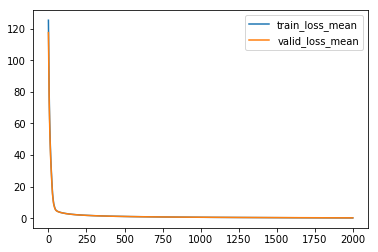

In [32]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss_mean, label='train_loss_mean')
mplot.plot(valid_loss_mean, label='valid_loss_mean')
mplot.legend()

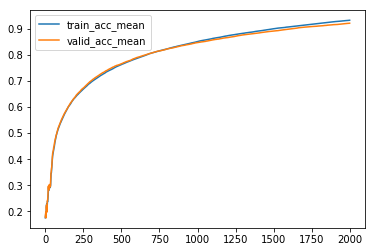

In [33]:
mplot.plot(train_acc_mean, label='train_acc_mean')
mplot.plot(valid_acc_mean, label='valid_acc_mean')
mplot.legend()

In [36]:
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # Loading the trained and validated model
#     saver.restore(save_path=tf.train.latest_checkpoint(checkpoint_dir='checkpoints/'), sess=sess)
    saver.restore(save_path='checkpoints/mlp-fnirs-har-10subjects.ckpt', sess=sess)
    
    # Saving the test loss for every batch/minibtch
    test_loss, test_acc = [], []
    
    # applying the loaded model on test data
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=Xvalid.shape[0]): 
        # X_NxWXCin, Y_NxCout
        feed_dict={X:Xarr, Y:Yarr}
        lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
        test_loss.append(lossarr)
        test_acc.append(accarr)
        
    # Printing the test loss
    print('test_loss:', np.mean(test_loss), 'test acc', np.mean(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/mlp-fnirs-har-10subjects.ckpt
test_loss: 0.32596165 test acc 0.9108694
